In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [5]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
# MY_GOOGLE_DRIVE_PATH = 'My Drive/Class_Python/MachineLearning/data'
MY_GOOGLE_DRIVE_PATH = 'My Drive'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive


In [6]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive


In [7]:
diabetes_data = pd.read_csv('diabetes.csv')

In [8]:
X = diabetes_data.drop(["Outcome"],axis = 1)
y = diabetes_data["Outcome"]
# 훈련 세트를 사용하여 다양한 하이퍼 파라미터로 여러 모델을 훈련하고 검증 세트에서 가장 잘 수행되는 모델과 하이퍼 파라미터를 선택합니다.
# 모델 유형과 하이퍼 파라미터가 선택되면 전체 훈련 세트에서 이러한 하이퍼 파라미터를 사용하여 최종 모델을 훈련시키고 일반화 된 오류는 테스트 세트에서 최종적으로 측정됩니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 56)

# StratifiedKFold 클래스는 계층화 된 샘플링을 수행하여 각 클래스의 대표 비율을 포함하는 폴드를 생성합니다.
cv = StratifiedKFold(n_splits=10, shuffle= False, random_state= 76)


# 로지스틱 회귀
clf_logreg = LogisticRegression()


# 검증 세트에 대한 클래스 예측을합니다.
y_pred_class_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv)


# 클래스 1에 대한 예측 확률, 양성 클래스의 확률
y_pred_prob_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_logreg_class1 = y_pred_prob_logreg[:, 1]


# SGD 분류기
clf_SGD = SGDClassifier()

# 적합 모델
clf_SGD.fit(X_train, y_train)

# 검증 세트에 대한 클래스 예측을합니다.
y_pred_class_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv)

# 클래스 1에 대한 예측 확률
y_pred_prob_SGD = cross_val_predict(clf_SGD, X_train, y_train, cv = cv, method="decision_function")


# 랜덤 포레스트 분류기
clf_rfc = RandomForestClassifier()

# 적합 모델
clf_rfc.fit(X_train, y_train)

# 검증 세트에 대한 클래스 예측을합니다.
y_pred_class_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv)

# 클래스 1에 대한 예측 확률
y_pred_prob_rfc = cross_val_predict(clf_rfc, X_train, y_train, cv = cv, method="predict_proba")
y_pred_prob_rfc_class1 = y_pred_prob_rfc[:, 1]

- 
빠른 참고 : SkLearn의 "predict_log_proba"는 확률의 로그를 제공합니다. 확률이 매우 작아 질 수 있으므로 종종 더 편리합니다.

널 정확도(null_accuracy) : 
- 항상 가장 빈번한 클래스를 예측하여 얻을 수있는 정확도.
- 이것은 항상 0/1을 예측하는 멍청한 모델이 "null_accuracy"%의 시간에 맞을 것이라는 것을 의미합니다.

In [9]:
from sklearn.base import BaseEstimator
import numpy as np

class BaseClassifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

base_clf = BaseClassifier()
cross_val_score(base_clf, X_train, y_train, cv=10, scoring="accuracy").mean()


# 방법 2
# null 정확도 계산 (바이너리 / 다중 클래스 분류 문제의 경우)
# null_accuracy = y_train.value_counts (). head (1) / len (y_train)

0.6509981851179674

**분류 정확도**
- 분류 정확도 또는 정확도는 총 입력 샘플 수에 대한 올바른 예측 수의 비율입니다.
$Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made} = \frac{TP + TN}{TP + TN + FP + FN}$

**정확도 측정 항목을 사용하는 경우 :**

- 각 클래스에 속하는 샘플 수가 거의 동일한 경우.

**정확도 측정 항목을 사용하지 않는 경우 :**
- 하나의 클래스 만 대부분의 샘플을 보유 할 때.

예 : 훈련 세트에 클래스 A의 샘플이 98 %이고 클래스 B의 샘플이 2 %라고 가정합니다. 그러면 우리 모델은 클래스 A에 속하는 모든 훈련 샘플을 간단히 예측하여 98 %의 훈련 정확도를 쉽게 얻을 수 있습니다.

동일한 모델이 클래스 A의 60 % 샘플과 클래스 B의 40 % 샘플이있는 테스트 세트에서 테스트되면 테스트 정확도가 60 %로 떨어집니다. 분류 정확도는 우리에게 높은 정확도를 달성한다는 잘못된 감각을 줄 수 있습니다.

In [10]:
# 정확도 계산
acc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring= 'accuracy').mean()
acc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring='accuracy').mean()
acc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv= cv, scoring= 'accuracy').mean()

acc_logreg,  acc_SGD, acc_rfc

(0.7797035692679977, 0.5382032667876588, 0.7762855414398064)

로그 손실 / 로그 손실 / 로지스틱 손실 / 교차 엔트로피 손실

- 로그 손실로 작업 할 때 분류기는 모든 샘플에 대해 각 클래스에 확률을 할당해야합니다.
- 로그 손실은 실제 레이블과 비교하고 잘못된 분류에 페널티를 적용하여 모델 확률의 불확실성을 측정합니다.
- 로그 손실은 둘 이상의 레이블에 대해서만 정의됩니다.
- 로그 손실은 예측 확률이 향상됨에 따라 점차 감소하므로 로그 손실이 0에 가까울수록 정확도가 높아지고 로그 손실이 0에서 멀어지면 정확도가 낮아집니다.
- 로그 손실은 (0, ∞] 범위에 있습니다.

M 클래스에 속하는 N 개의 샘플이 있다고 가정하면 로그 손실은 다음과 같이 계산됩니다.

$Log\ Loss = \frac{-1}{N} \sum_{i=1}^{N} \sum_{i=1}^{M}  y_{ij} * \log(\hat{y_{ij}})$


어디,

$\log(\hat{y_{ij}})$는 샘플 i가 클래스 j에 속하는지 여부를 나타냅니다.

$p_{ij}$는 클래스 j에 속하는 샘플 i의 확률을 나타냅니다.

음수 부호는 항상 음수 인 $\log(\hat{y_{ij}})$ 출력을 부정합니다. $y_{ij}$ ^는 확률 (0-1)을 출력하고, log (x)는 0 <x <1이면 음수입니다.

예 : 학습 레이블은 0과 1이지만 학습 예측은 0.4, 0.6, 0.89 등입니다. 모델의 오류 측정 값을 계산하기 위해 0.5보다 큰 값을 갖는 모든 관측 값을 1로 분류 할 수 있습니다. 우리는 오 분류를 증가시킬 위험이 높습니다. 확률이 0.4, 0.45, 0.49 인 많은 값이 1의 참값을 가질 수 있기 때문입니다.

이것이 logLoss가 등장하는 곳입니다.

이제 LogLoss의 공식을 자세히 살펴 보겠습니다. yij 및 $p_{ij}$ 값에는 4 가지 주요 사례가있을 수 있습니다.

Case 1 :  $y_{ij}$ =1 ,  $p_{ij}$  = High

Case 2 :  $y_{ij}$ =1 ,  $p_{ij}$  = Low

Case 3 :  $y_{ij}$ =0 ,  $p_{ij}$  = Low

Case 4 :  $y_{ij}$ =0 ,  $p_{ij}$  = High

LogLoss는 불확실성을 어떻게 측정합니까?

케이스 1과 케이스 3이 더 많이있는 경우 로그 로스 공식 내부의 합계 (및 평균)는 케이스 2와 케이스 4가 추가 된 경우에 비해 훨씬 더 커질 것입니다. 이제이 값은 좋은 예측을 나타내는 Case 1 및 Case 3만큼 큽니다. (-1)을 곱하면 값을 가능한 한 작게 만듭니다. 이것은 이제 직관적으로 의미합니다-값이 작을수록 모델이 더 좋습니다. 즉, 로그 손실이 더 적고, 모델이 더 좋습니다. 즉, 불확실성이 작을수록 모델이 더 좋습니다.

In [11]:
# logloss 계산
logloss_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
logloss_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()
# SGDClassifier의 힌지 손실은 확률 추정을 지원하지 않습니다.
# Scikit-learn의 CalibratedClassifierCV에서 SGDClassifier를 기본 추정기로 설정하여 확률 추정치를 생성 할 수 있습니다.

from sklearn.calibration import CalibratedClassifierCV

new_clf_SGD = CalibratedClassifierCV(clf_SGD)
new_clf_SGD.fit(X_train, y_train)
logloss_SGD = cross_val_score(new_clf_SGD, X_train, y_train, cv = cv, scoring = 'neg_log_loss').mean()

logloss_logreg, logloss_SGD, logloss_rfc

(-0.48368646454082465, -0.6355939447752668, -0.4784830149254017)

**ROC 곡선**

ROC는 민감도와 특이 도로 나눌 수 있습니다. 최상의 모델을 선택하는 것은 1을 정확하게 예측하거나 0을 정확하게 예측하는 것 사이의 일종의 균형입니다. 즉, 감도와 특이성.

- True Positive Rate (감도 / 리콜) : True Positive Rate는 TP / (FN + TP)로 정의됩니다. 참 양성률은 모든 긍정적 인 데이터 요소와 관련하여 올바르게 긍정적 인 것으로 간주되는 긍정적 인 데이터 요소의 비율에 해당합니다.

- False Positive Rate (Specificity) : False Positive Rate는 FP / (FP + TN)로 정의됩니다. False Positive Rate는 모든 부정적인 데이터 포인트와 관련하여 실수로 긍정으로 간주되는 부정적인 데이터 포인트의 비율에 해당합니다.

참 양성률과 거짓 양성률은 모두 [0, 1] 범위의 값을 갖습니다. TPR과 FPR은 모두 (0.00, 0.02, 0.04,…., 1.00)과 같은 임계 값에서 계산되고 그래프가 그려집니다.

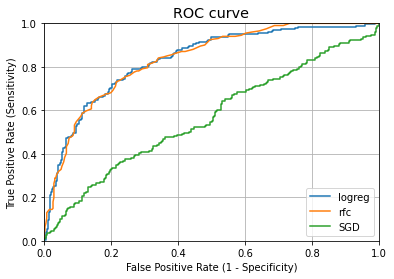

In [12]:
# 중요 : 첫 번째 인수는 참 값이고 두 번째 인수는 예측 확률입니다.

# y_test와 y_pred_prob를 통과합니다.
# y_pred_class를 사용하지 않습니다. 오류를 생성하지 않고 잘못된 결과를 제공하기 때문입니다.
# roc_curve는 3 개의 객체를 반환합니다. 

fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_train, y_pred_prob_logreg_class1)
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_train, y_pred_prob_rfc_class1)
fpr_SGD, tpr_SGD, thresholds_SGD = metrics.roc_curve(y_train, y_pred_prob_SGD)

plt.plot(fpr_logreg, tpr_logreg, label="logreg")
plt.plot(fpr_rfc, tpr_rfc, label="rfc")
plt.plot(fpr_SGD, tpr_SGD, label="SGD")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

ROC 플롯 해석 :
ROC 플롯을 해석하는 것은 일반 라인 플롯과 매우 다릅니다. X와 Y 축이 있지만 X 값이 0.25 인 경우 Y 값은 .9로 읽지 않기 때문입니다.

대신 여기에있는 것은 왼쪽 하단의 1에서 오른쪽 상단의 0까지 확률 컷오프를 추적하는 선입니다.

이것은 0에서 1까지의 전체 범위의 확률 컷오프에 대해 민감도와 특이도가 어떻게 수행되는지 분석하는 방법입니다.

이상적으로는 완벽한 모델이있는 경우 모든 이벤트의 확률 점수는 1이고 모든 비 이벤트의 점수는 0입니다. 이러한 모델의 경우 ROC 아래 영역은 완벽한 1이됩니다.

따라서 왼쪽 아래에서 곡선을 따라 가면 확률 컷오프의 값이 1에서 0으로 감소합니다. 좋은 모델이 있으면 실제 이벤트의 대부분을 이벤트로 예측해야하므로 민감도가 높고 FPR이 낮아집니다. 이 경우 곡선은 오른쪽 상단에 도달하기 전에 넓은 영역을 포함하여 가파르게 상승합니다.

따라서 ROC 곡선 아래 영역이 클수록 모델이 더 좋습니다.

ROC 곡선은 예측 확률 컷오프의 다양한 값에 대해 모델이 얼마나 잘 수행하는지 측정하는 유일한 측정 항목입니다.

In [13]:
# 임계 값을 받아들이고 민감도와 특이성을 인쇄하는 함수를 정의합니다.
def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])

In [14]:
# 로지스틱 회귀
evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.2), evaluate_threshold(tpr_logreg, fpr_logreg, thresholds_logreg, 0.8)

Sensitivity: 0.8855721393034826
Specificity: 0.5706666666666667
Sensitivity: 0.24875621890547264
Specificity: 0.9733333333333334


(None, None)

In [15]:
# 랜덤 포레스트 분류기
evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.2), evaluate_threshold(tpr_rfc, fpr_rfc, thresholds_rfc, 0.8)

Sensitivity: 0.8955223880597015
Specificity: 0.5333333333333333
Sensitivity: 0.14427860696517414
Specificity: 0.984


(None, None)

In [16]:
# SGD
evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.2), evaluate_threshold(tpr_SGD, fpr_SGD, thresholds_SGD, 0.8)

Sensitivity: 0.47761194029850745
Specificity: 0.64
Sensitivity: 0.47761194029850745
Specificity: 0.64


(None, None)

AUC
- ROC-AUC 점수의 확률 론적 해석은 양성 사례와 음성 사례를 무작위로 선택하면 분류 자에 따라 양성 사례가 음성 사례보다 순위가 높을 확률이 AUC에 의해 제공된다는 것입니다. 여기서 순위는 예측값의 순서에 따라 결정됩니다.
- ROC-AUC 점수는 절대 값이 아닌 각 예측의 순위 만 고려하므로 분류를 위해 설정된 임계 값과 독립적입니다. 확률 출력의 경우 임계 값이 필요한 F1 점수의 경우에도 마찬가지입니다.
- AUC는 곡선 아래에있는 ROC 플롯의 백분율입니다.
- AUC는 양성 및 음성 클래스를 구별하는 모델의 능력을 나타냅니다. 1.0 영역은 모든 예측을 완벽하게 수행 한 모델을 나타냅니다. 0.5의 영역은 무작위로 좋은 모델을 나타냅니다.
- AUC는 높은 등급의 불균형이있는 경우에도 유용합니다 (분류 정확도와 달리).
- 사기 사건
 - 거의 99 %의 Null 정확도
 - AUC는 여기에 유용합니다.

일반 AUC 예측 :

- 90-1 = 우수
- 80-.90 = 좋음
- 70-.80 = 보통
- 60-.70 = 나쁨
- 50-.60 = 실패

AUC ROC는 모델의 성능을 결정하기 위해 예측 된 확률을 고려합니다. 그러나 확률의 순서 만 고려하므로 양수일 가능성이 더 높은 샘플 (로그 손실)에 대해 더 높은 확률을 예측하는 모델의 기능은 고려하지 않습니다.

AUC는 다양한 결정 임계 값이있는 이진 분류와 관련하여 계산되는 반면, 로그 손실은 실제로 분류의 "확실성"을 고려합니다.

In [17]:
# 중요 : 첫 번째 인수는 참 값이고 두 번째 인수는 예측 확률입니다.
# print (metrics.roc_auc_score (y_test, y_pred_prob))

In [18]:
roc_auc_logreg = cross_val_score(clf_logreg, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_SGD = cross_val_score(clf_SGD, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()
roc_auc_rfc = cross_val_score(clf_rfc, X_train, y_train, cv = cv, scoring = 'roc_auc').mean()

roc_auc_logreg, roc_auc_SGD, roc_auc_rfc

(0.8355808440018967, 0.5851354738196843, 0.8370852807694913)

**혼동 매트릭스**

혼동 행렬은 N X N 행렬입니다. 여기서 N은 예측되는 클래스의 수입니다. Confusion Matrix는 행렬을 출력으로 제공하고 모델의 전체 성능을 설명합니다.

올바른 예측은 행렬의 대각선에 있습니다.

혼동 행렬의 4 가지 중요한 용어 :

- True Positives : 우리가 YES를 예측하고 실제 결과도 YES 인 경우.
- True Negatives : NO를 예측하고 실제 결과가 NO 인 경우.
- False Positives : YES를 예측하고 실제 결과가 NO 인 경우.
- False Negatives : 아니오를 예측하고 실제 결과가 YES 인 경우.

혼동 매트릭스 자체는 성능 측정이 아니지만 거의 모든 성능 지표는 혼동 매트릭스와 그 안에있는 숫자를 기반으로합니다.

In [19]:
logreg_matrix = metrics.confusion_matrix(y_train, y_pred_class_logreg)
print(logreg_matrix)

[[331  44]
 [ 83 118]]


In [20]:
SGD_matrix = metrics.confusion_matrix(y_train, y_pred_class_SGD)
print(SGD_matrix)

[[308  67]
 [150  51]]


In [21]:
rfc_matrix = metrics.confusion_matrix(y_train, y_pred_class_rfc)
print(rfc_matrix)

[[320  55]
 [ 73 128]]


**분류 보고서**

classification_report () 함수는 각 클래스에 대한 정밀도, 재현율, f1 점수 및 지원을 표시합니다.

**정도**

분류자가 예측 한 긍정적 결과의 수로 나눈 참 양성 수입니다.

$Precision =  \frac{True\ Positives}{True\ Positives + False\ Positives}$


**리콜 / 감도**

참 양성 수를 모든 관련 샘플 (양성으로 식별되어야하는 모든 샘플)의 수로 나눈 값입니다.

$Recall =  \frac{True\ Positives}{True\ Positives + False\ Negatives}$


- False Negatives를 최소화하려면 Recall이 100 %에 가깝도록해야합니다.
- 오탐을 최소화하려면 정밀도가 100 %에 가까워 야합니다.

**특이성 / TNR (참 음성 비율)**

올바르게 식별 된 실제 음성 사례의 비율입니다.
특이성은 Recall과 정반대입니다.
$Specificity =  \frac{True\ Negatives}{True\ Negatives + False\ Positives}$

**F1 점수**

- F1 점수는 정밀도와 재현율 사이의 조화 평균입니다.

- 분류 기가 얼마나 정확한지 (올바르게 분류하는 인스턴스 수)와 견고 함 (많은 인스턴스를 놓치지 않음)을 알려줍니다.

- F1 점수가 높을수록 모델의 성능이 더 좋습니다.
- 범위 [0, 1].

$F1 = 2 * \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$